# Get started

Minimal introduction: 

1. Download the module
2. Import agrid
3. Install missing packages, as notified

In [20]:
from agrid.agrid import *
from agrid.acc import download

Download some data, assign some meta data. 

In [21]:
download('https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/raster/HYP_50M_SR_W.zip',
         '../data/ne/HYP_50M_SR_W.zip',
        meta_dict={'Project' : 'Start using agrid', 'Dataset' : 'World raster'})

File ../data/ne/HYP_50M_SR_W.zip already exists.
Saved:  ../data/ne/HYP_50M_SR_W.zip


{'Project': 'Start using agrid', 'Dataset': 'World raster'}

Initiate the grid object: 

In [22]:
#Global
world = Grid(crs=4326, res = [0.5, 0.5], left = -180, up=90, right = 180, down = -90)

Get some data:

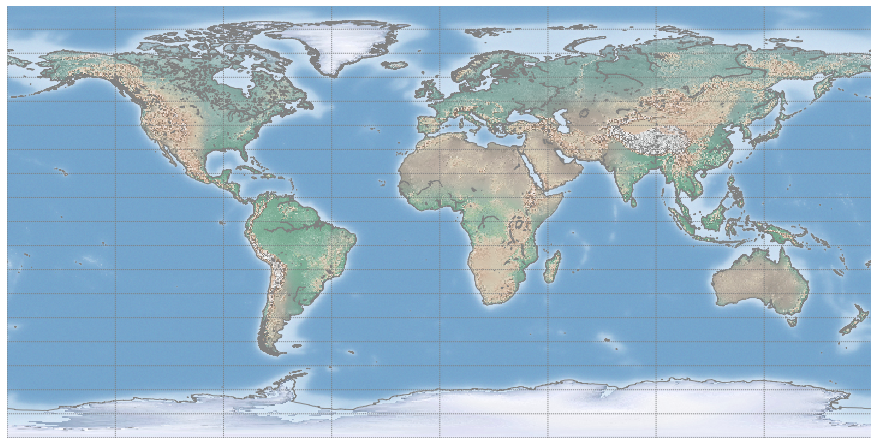

In [23]:
world.ds['RGB_RASTER'] = (('Y', 'X', 'RGB'), 
                world.read_raster('../data/ne/HYP_50M_SR_W/HYP_50M_SR_W.tif', sub_sampling=5) )
world.map_grid('RGB_RASTER')

In [24]:
ne_url = 'https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/physical/ne_10m_land.zip'
download(ne_url,'../data/ne/ne_10m_land.zip', 
        meta_dict={'Project' : 'Start using agrid', 'Dataset' : 'World vector'})

File ../data/ne/ne_10m_land.zip already exists.
Saved:  ../data/ne/ne_10m_land.zip


{'Project': 'Start using agrid', 'Dataset': 'World vector'}

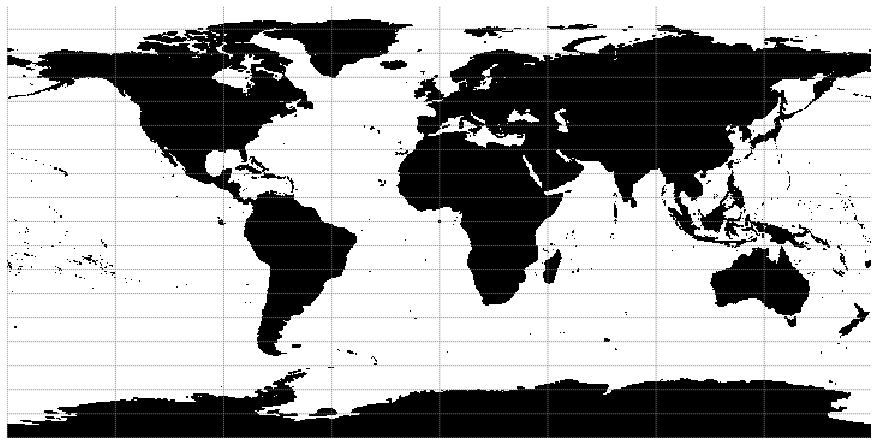

In [25]:
# Using standard xarray assignment:
world.ds['LAND'] = (('Y', 'X'), 
                     world.assign_shape('../data/ne/ne_10m_land.shp', 'scalerank', 
                                        burn_val=1, map_to_int=False) )
world.map_grid('LAND', draw_coast = False)

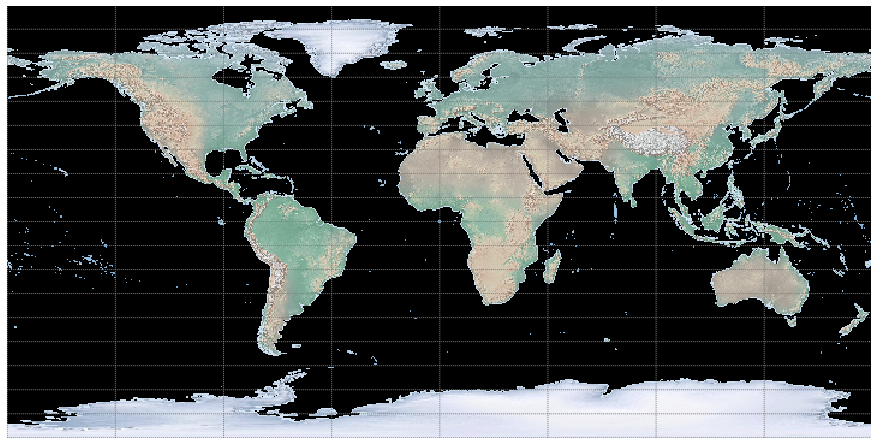

In [26]:
world.map_grid(world.ds['LAND']*world.ds['RGB_RASTER'], draw_coast = False)

In [34]:
part_of_world = Grid(crs=4326, res = [0.01, 0.01], left = 90, up=10, right = 120, down = -10)

In [41]:
#part_of_world.ds['RGB_RASTER'] = (('Y', 'X', 'RGB'), 
#                part_of_world.read_raster('../data/ne/HYP_50M_SR_W/HYP_50M_SR_W.tif', sub_sampling=1) )



part_of_world.map_grid('RGB_RASTER', par=list(range(-10,10,5)), mer=list(range(90,120,5)  )

SyntaxError: unexpected EOF while parsing (<ipython-input-41-8b3bdeec5096>, line 6)

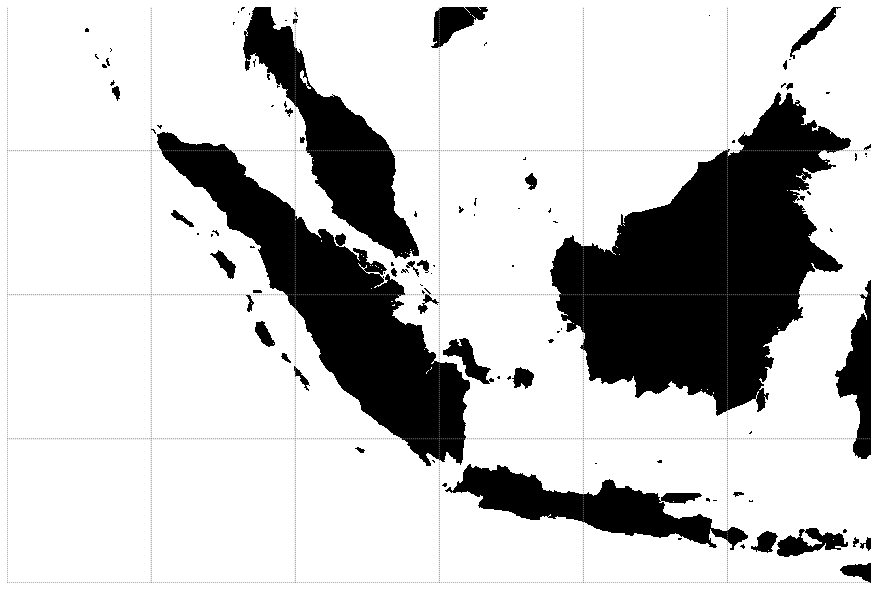

In [38]:
# Using standard xarray assignment:
part_of_world.ds['LAND'] = (('Y', 'X'), 
                     part_of_world.assign_shape('../data/ne/ne_10m_land.shp', 'scalerank', 
                                        burn_val=1, map_to_int=False) )
part_of_world.map_grid('LAND', draw_coast = False, par=list(range(-10,10,5)), mer=list(range(90,120,5)))